In [1]:
import pandas as pd

data = {'Hora': ['08:15', '09:30', '12:45', '14:20', '17:00'],
        'Producto': ['Café', 'Sándwich', 'Refresco', 'Café', 'Chocolate'],
        'Cantidad': [5, 3, 2, 4, 1],
        'Precio Unitario': [2, 5, 3, 2, 4],
        'Total Venta': [10, 15, 6, 8, 4]}

df = pd.DataFrame(data)

print(df)

    Hora   Producto  Cantidad  Precio Unitario  Total Venta
0  08:15       Café         5                2           10
1  09:30   Sándwich         3                5           15
2  12:45   Refresco         2                3            6
3  14:20       Café         4                2            8
4  17:00  Chocolate         1                4            4


In [2]:
print(df.isnull().sum())

Hora               0
Producto           0
Cantidad           0
Precio Unitario    0
Total Venta        0
dtype: int64


In [6]:
df['Precio Unitario'].fillna(df['Precio Unitario'].mean())

,Precio Unitario
0,2
1,5
2,3
3,2
4,4


In [5]:
print(df.isnull().sum())

Hora               0
Producto           0
Cantidad           0
Precio Unitario    0
Total Venta        0
dtype: int64


In [8]:
# Revisión de valores nulos
print("Valores Nulos por columna:")
print(df.isnull().sum())

# Revisión de tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)

# Verificación de la columna 'Total Venta'
df['Total Venta Calculado'] = df['Cantidad'] * df['Precio Unitario']

if (df['Total Venta'] == df['Total Venta Calculado']).all():
    print("\nLa columna 'Total Venta' es correcta.")
else:
    print("\n¡Atención! La columna 'Total Venta' tiene errores.")
    print("Comparación entre 'Total Venta' y 'Total Venta Calculado':")
    print(df[['Total Venta', 'Total Venta Calculado']])

Valores Nulos por columna:
Hora               0
Producto           0
Cantidad           0
Precio Unitario    0
Total Venta        0
dtype: int64

Tipos de datos por columna:
Hora               object
Producto           object
Cantidad            int64
Precio Unitario     int64
Total Venta         int64
dtype: object

La columna 'Total Venta' es correcta.


In [9]:
# 1. Calcular el total de ventas del día
total_ventas_dia = df['Total Venta'].sum()
print(f"Total de ventas del día: {total_ventas_dia}")

# 2. Identificar el producto más vendido
producto_mas_vendido_cantidad = df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False)
producto_mas_vendido_nombre = producto_mas_vendido_cantidad.index[0]
cantidad_mas_vendido = producto_mas_vendido_cantidad.iloc[0]
print(f"\nProducto más vendido (por cantidad): {producto_mas_vendido_nombre} (Cantidad: {cantidad_mas_vendido})")

producto_mas_vendido_valor = df.groupby('Producto')['Total Venta'].sum().sort_values(ascending=False)
producto_mas_vendido_valor_nombre = producto_mas_vendido_valor.index[0]
valor_mas_vendido = producto_mas_vendido_valor.iloc[0]
print(f"Producto más vendido (por valor): {producto_mas_vendido_valor_nombre} (Ventas: {valor_mas_vendido})")


# 3. Identificar el producto menos vendido
producto_menos_vendido_cantidad = df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=True)
producto_menos_vendido_nombre = producto_menos_vendido_cantidad.index[0]
cantidad_menos_vendido = producto_menos_vendido_cantidad.iloc[0]
print(f"\nProducto menos vendido (por cantidad): {producto_menos_vendido_nombre} (Cantidad: {cantidad_menos_vendido})")

producto_menos_vendido_valor = df.groupby('Producto')['Total Venta'].sum().sort_values(ascending=True)
producto_menos_vendido_valor_nombre = producto_menos_vendido_valor.index[0]
valor_menos_vendido = producto_menos_vendido_valor.iloc[0]
print(f"Producto menos vendido (por valor): {producto_menos_vendido_valor_nombre} (Ventas: {valor_menos_vendido})")


# 4. Calcular el promedio de ventas por transacción
promedio_ventas_transaccion = df['Total Venta'].mean()
print(f"\nPromedio de ventas por transacción: {promedio_ventas_transaccion:.2f}")


Total de ventas del día: 43

Producto más vendido (por cantidad): Café (Cantidad: 9)
Producto más vendido (por valor): Café (Ventas: 18)

Producto menos vendido (por cantidad): Chocolate (Cantidad: 1)
Producto menos vendido (por valor): Chocolate (Ventas: 4)

Promedio de ventas por transacción: 8.60


In [10]:
import matplotlib.pyplot as plt

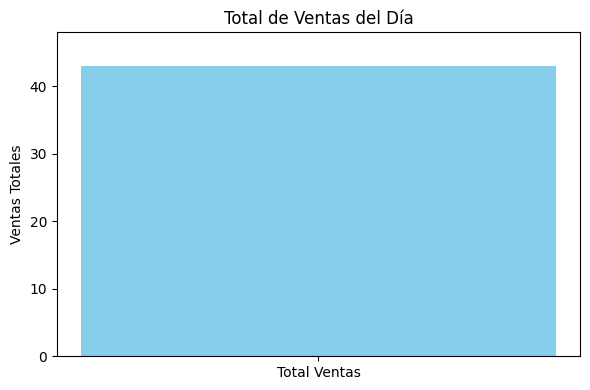

In [11]:
# 1. Gráfico de Barras para el Total de Ventas del Día
plt.figure(figsize=(6, 4))
plt.bar(['Total Ventas'], [df['Total Venta'].sum()], color='skyblue')
plt.title('Total de Ventas del Día')
plt.ylabel('Ventas Totales')
plt.ylim(0, df['Total Venta'].sum() + 5) # Ajustar límite superior del eje y
plt.tight_layout()
plt.show()

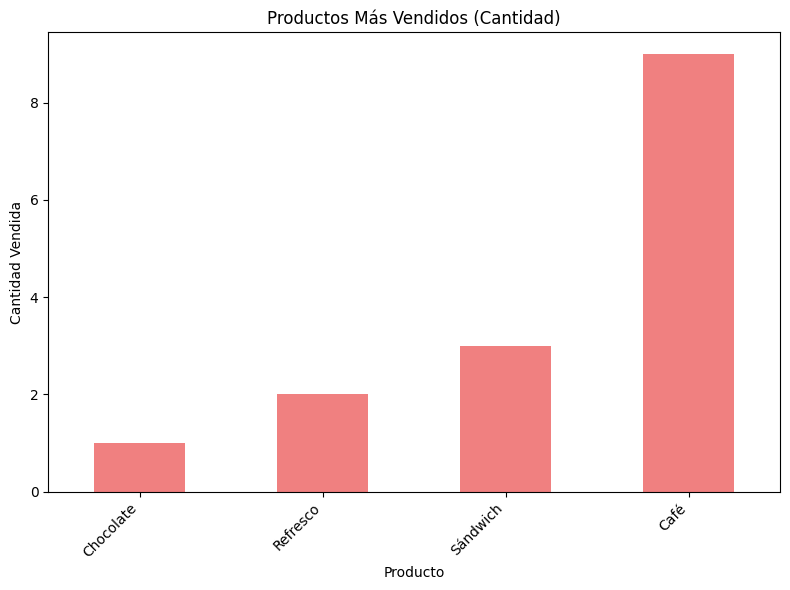

In [13]:
# 2. Gráfico de Barras para Productos Más Vendidos (Cantidad)
producto_mas_vendido_cantidad = df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=True)
plt.figure(figsize=(8, 6))
producto_mas_vendido_cantidad.plot(kind='bar', color='lightcoral')
plt.title('Productos Más Vendidos (Cantidad)')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout()
plt.show()

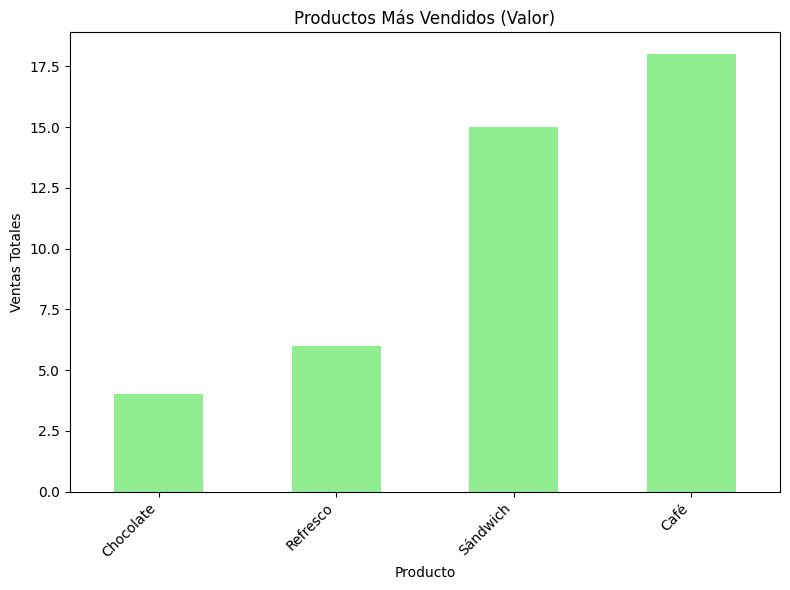

In [15]:
# 3. Gráfico de Barras para Productos Más Vendidos (Valor)
producto_mas_vendido_valor = df.groupby('Producto')['Total Venta'].sum().sort_values(ascending=True)
plt.figure(figsize=(8, 6))
producto_mas_vendido_valor.plot(kind='bar', color='lightgreen')
plt.title('Productos Más Vendidos (Valor)')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

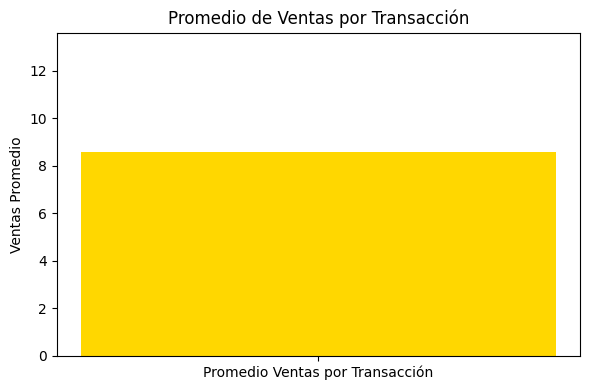

In [17]:
# 6. Gráfico de Barras para el Promedio de Ventas por Transacción
plt.figure(figsize=(6, 4))
plt.bar(['Promedio Ventas por Transacción'], [df['Total Venta'].mean()], color='gold')
plt.title('Promedio de Ventas por Transacción')
plt.ylabel('Ventas Promedio')
plt.ylim(0, df['Total Venta'].mean() + 5) # Ajustar límite superior del eje y
plt.tight_layout()
plt.show()

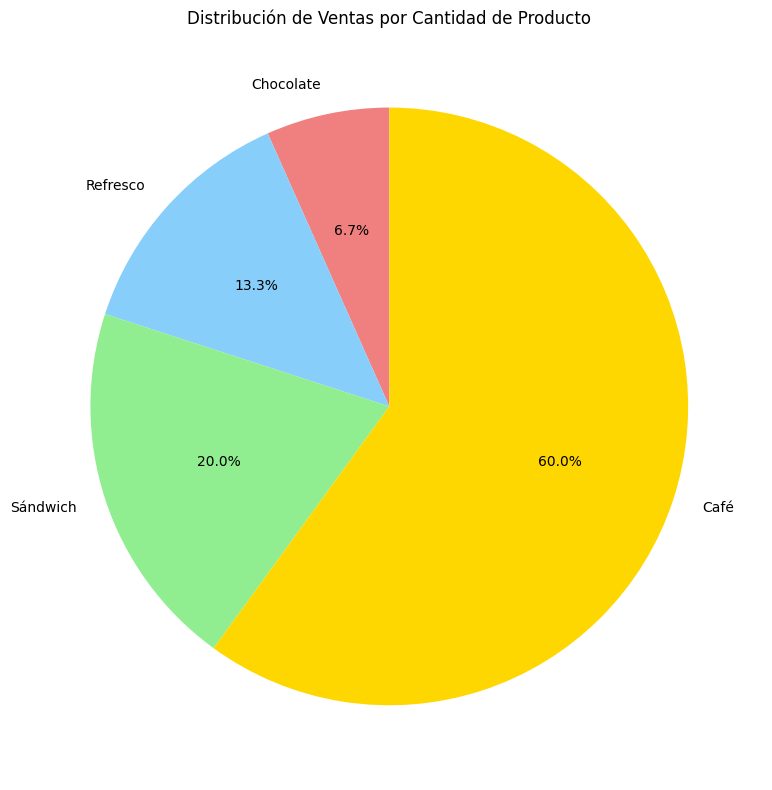

In [19]:
#Gráfico de Pastel para Productos Más Vendidos por Cantidad
plt.figure(figsize=(8, 8))
plt.pie(producto_mas_vendido_cantidad, labels=producto_mas_vendido_cantidad.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.title('Distribución de Ventas por Cantidad de Producto')
plt.tight_layout()
plt.show()